# Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import time

# Importanto Database

In [2]:
data = pd.read_csv("dataset_SIN492.parquet.csv")
data.head(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7,0
1,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0,1
2,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4,0
3,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0,1
4,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1,0
5,850.0,9,1435.68,1.60,-848.40,0.589167,1440,0.003879,1.692221,371185,2745.78,0.522868,40.400000,0.014583,68.365714,21,1
6,50.0,1,436.85,6.80,-82.15,0.238116,345,0.018375,5.317712,18776,959.57,0.455256,20.537500,0.011594,109.212500,4,1
7,0.0,0,0.00,-6.50,-16.80,0.150000,112,0.017231,0.000000,6500,6692.13,0.000000,0.000000,0.000000,0.000000,0,0
8,100.0,11,1027.86,79.76,-110.56,0.362500,288,0.015098,9.845402,19075,3611.20,0.284631,8.030769,0.045139,79.066154,13,0
9,600.0,21,2876.01,3.68,-596.32,0.265251,2247,0.004584,4.825358,490191,2324.27,1.237382,31.369474,0.008456,151.368947,19,1


# Características do Conjunto de Dados

In [4]:
X = data.iloc[:,:15].values
y = data.iloc[:,16].values

In [5]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([206, 260], dtype=int64))

# Divisão de Treinamento e Teste
## Padronizar os recursos da matriz X (Média de 0 e desvio Padrão 1)

In [6]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scale_obj = StandardScaler()
XTrain = scale_obj.fit_transform(XTrain.astype(float))
XTest = scale_obj.transform(XTest.astype(float))

# Treinamento utilizando Regressão Logística

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

Tempo de treino: 0.030798699999991186


In [8]:
model.score(XTest, yTest)

0.6702127659574468

# Matriz de Confusão

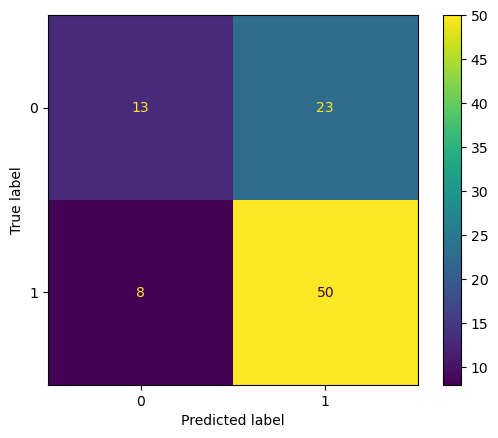

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, XTest, yTest)

# Modelo com PCA

In [10]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
XTrain = pca.fit_transform(XTrain)
XTest = pca.transform(XTest)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

Tempo de treino: 0.005506400000001577


In [12]:
model.score(XTest, yTest)

0.6276595744680851

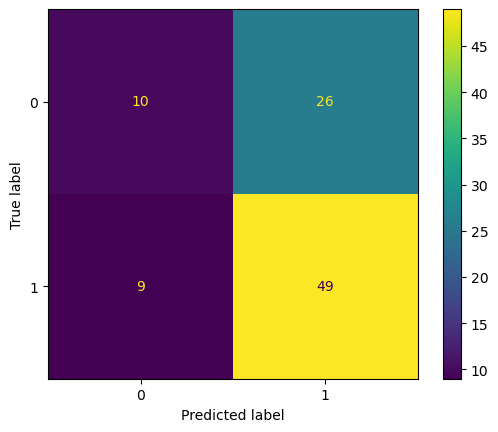

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, XTest, yTest)